# Regression Exercise
Using Regression to predict wine quality.

## Import Our Libraries

In [54]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stats

# Rodom forest regressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/winequality-white.csv`

In [3]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/winequality-white.csv')

# DISPLAY THE FIRST 5 ROWS
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                 45.0                 170.0  3.00       0.45      8.8   
1                 14.0                 132.0  3.30       0.49      9.5   
2                 30.0                  97.0  3.26       0.44     10.1   
3                 47.0                 186.0  3.19       0.40      9.9   
4                 47.0                 186.0  3.19       0.40      9.9   

   quality  
0        6  
1        6  
2        6  
3        6  
4        6

# Inspect our data using `df.describe()` function.

In [5]:
# Inspect our data using `df.describe()` function.
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4893.000000       4893.000000  4893.000000     4893.000000   
mean        6.854210          0.278221     0.334139        6.393736   
std         0.843637          0.100831     0.121048        5.072990   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide           pH  \
count  4893.000000          4893.000000           4893.000000  4893.000000   
mean      0.045791            35.310035            138.383507     3.188144   
std       0.021850            17.011384             42.509982     0.151011   
min       0.009000             2.000000              9.000000     2.720000   
25%       0.036000            23.000000            108.000000     3.090000   
50%       0.043000            34.000000            134.000000     3.180000   
75%       0.050000            46.000000            167.000000     3.280000   
max       0.346000           289.000000            440.000000     3.820000   

         sulphates      alcohol      quality  
count  4893.000000  4893.000000  4893.000000  
mean      0.489871    10.512565     5.874719  
std       0.114151     1.229755     0.880446  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.000000  
50%       0.470000    10.400000     6.000000  
75%       0.550000    11.400000     6.000000  
max       1.080000    14.200000     8.000000

# Check for Nulls.

In [6]:
# Check for Nulls.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Check for Duplicates

In [7]:
# Check for Duplicates
df.duplicated().sum()


937

In [8]:
# Remove duplicates
print(df.shape)

# REMOVE DUPLICATES HERE
df = df.drop_duplicates()

# Sanity check
print(df.shape)

(4893, 11)
(3956, 11)


# Visualize our data to discover outliers.
* Use `sns.pariplot`

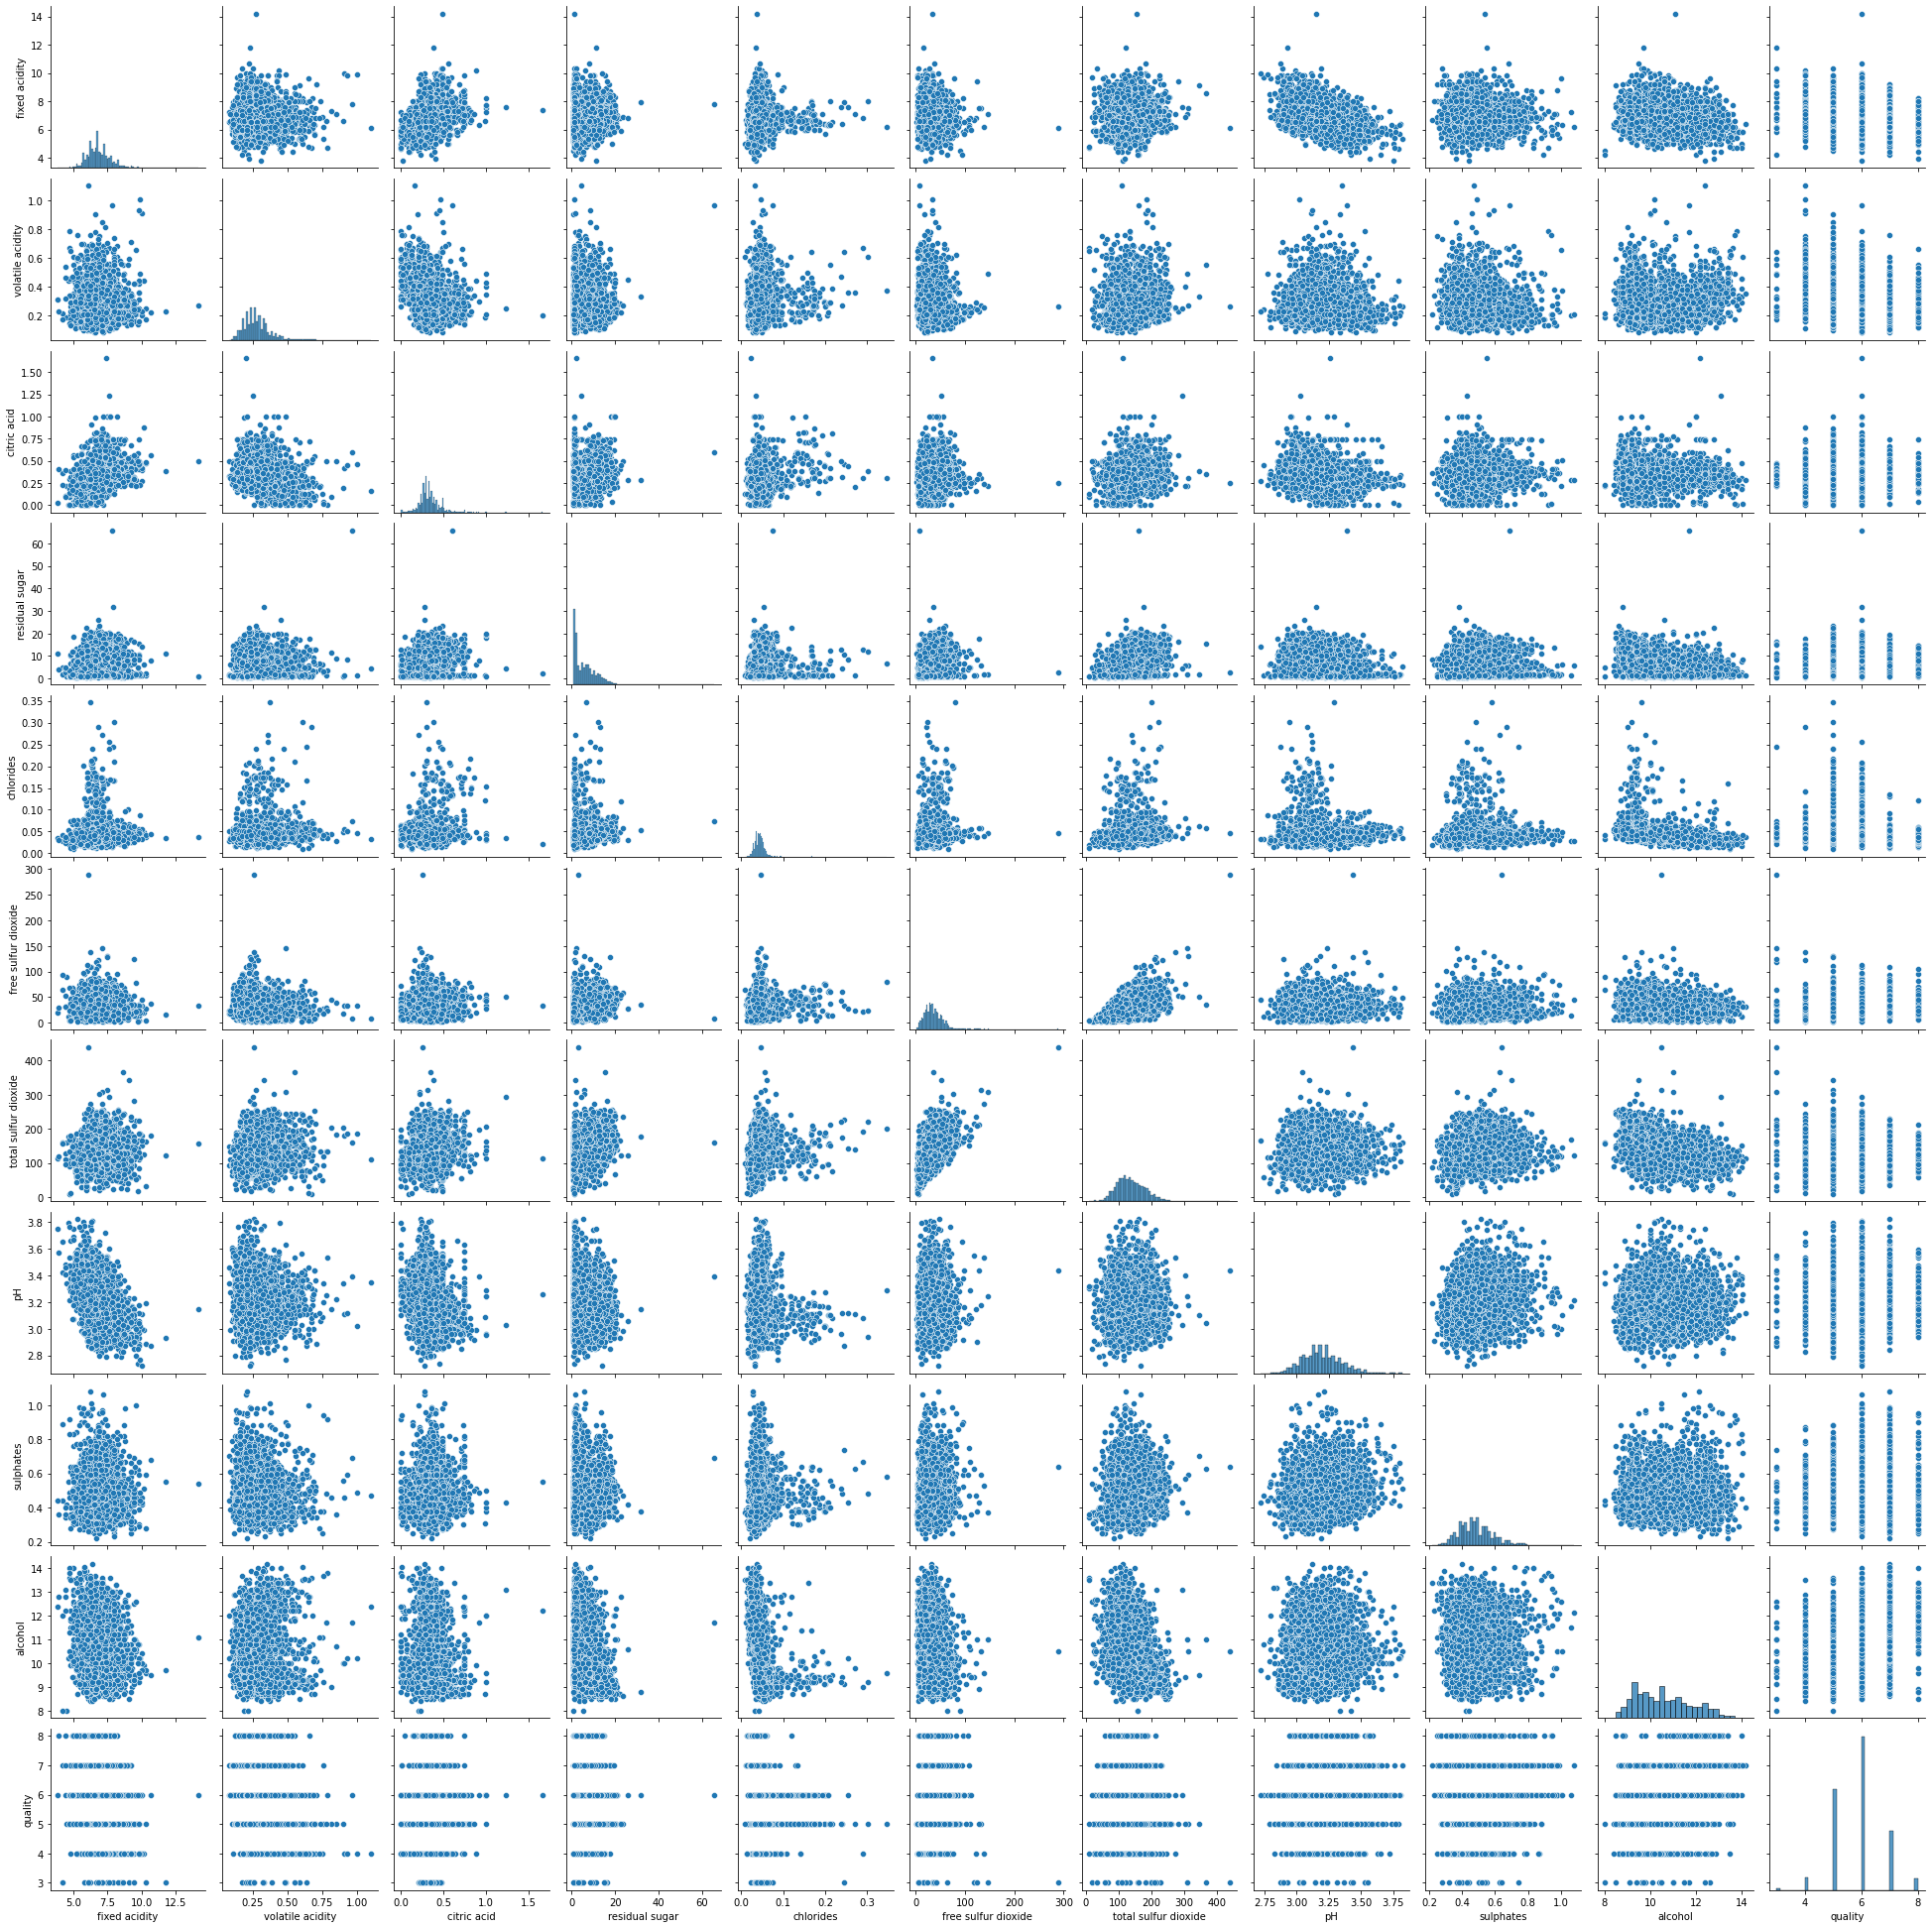

In [12]:
# Visualize our data to discover outliers.
sns.pairplot(data=df)

___
# STEP 2  (s):  Select and Engineer Features

# Remove outliers
* Make sure you DO NOT remove outliers from our target variable of `quality`.

In [13]:
# Keep this for later
original_cols = df.columns

# Set the columns you want to remove outliers for
target_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
               'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']

# Make a new list that is going to contain our z-score
z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_cols = col + 'z_score'
    
    # Set the new column equal to the score
    df[new_cols] = stats.stats.zscore(df[col])
    
    # Set the z-score to its absolute value of the for easier filtering
    df[new_cols] = abs(df[new_cols])
    
    # Append the new column name our our z_score_cols list for easier access for later.
    z_score_cols.append(new_cols)


# remove any value that is 3 standard deviations away from its mean
condition = df[z_score_cols] < 3

# Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

# Apply our condition to our dataframe and replace our current dataframe with the applied condition.
df = df[condition]

print('After removal of outliers', df.shape)

Before removal of outliers (3956, 21)
After removal of outliers (3629, 21)


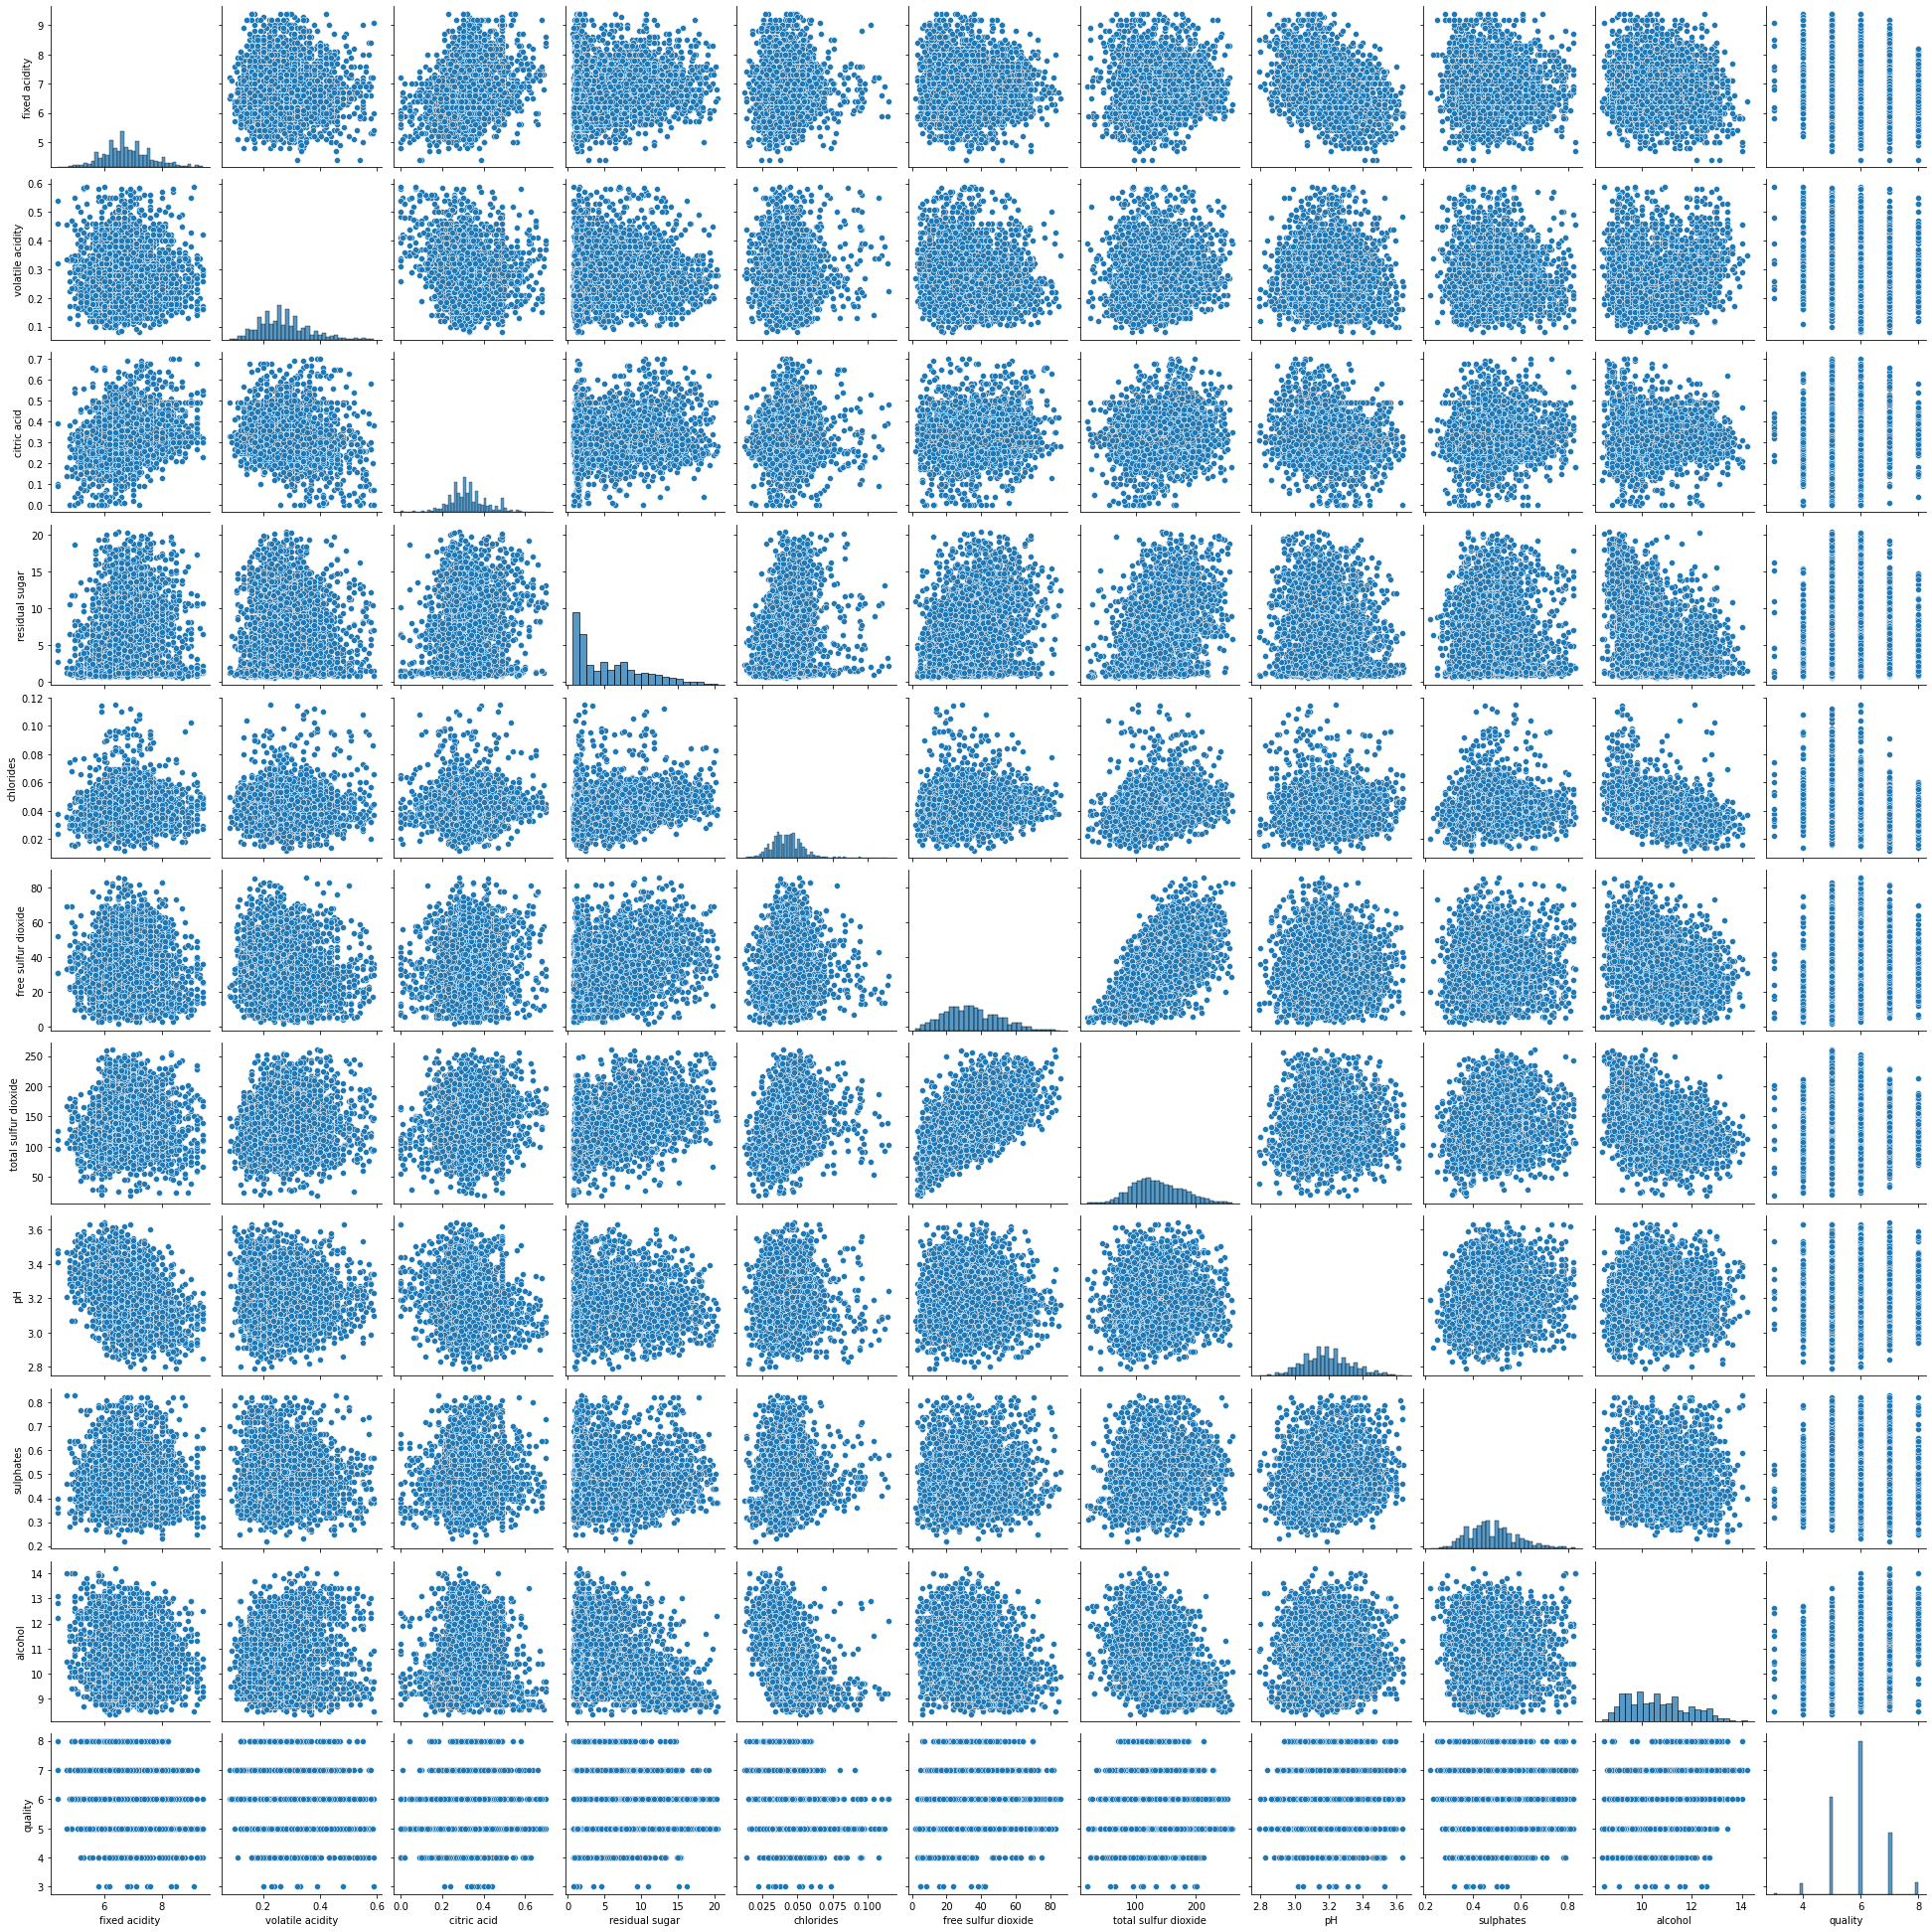

In [14]:
# Keep only original columns
df = df[original_cols]

# Visualize using sns.pairplot again to see if outliers were removed. 
sns.pairplot(df)

# Find which features have a linear relationship with quality.
* Plot below the linear relationship between each variable against quality.
* Use `sns.relplot`

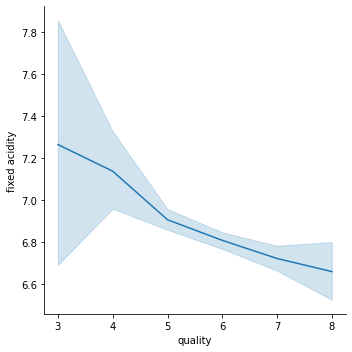

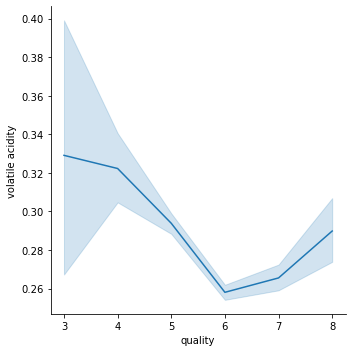

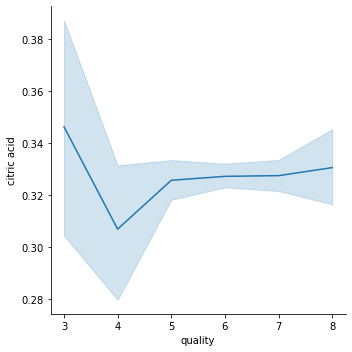

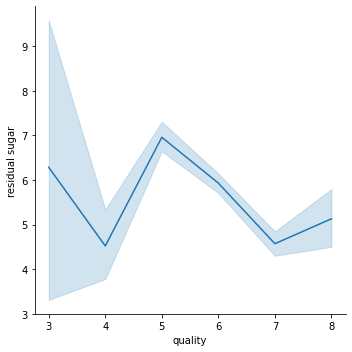

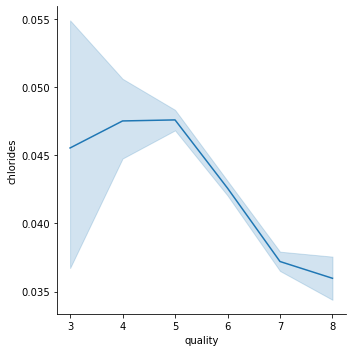

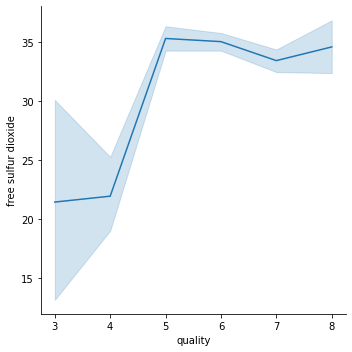

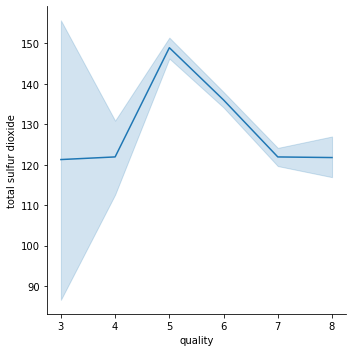

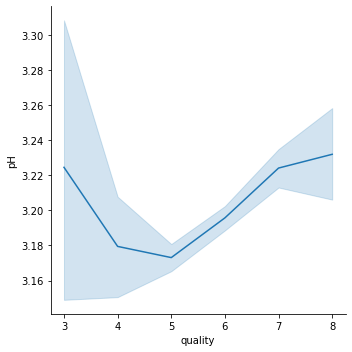

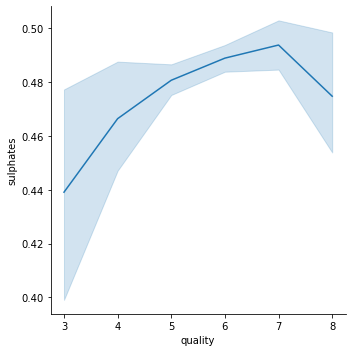

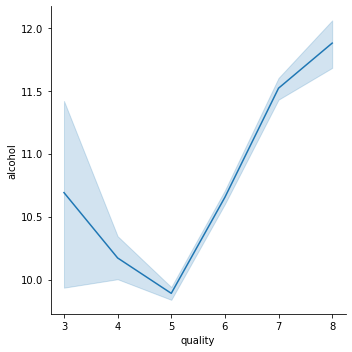

In [17]:
# Plot below the linear relationship between each variable against quality

all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# YOURE GOING TO NEED TO USE A LOOP
for feature in all_features:
    sns.relplot(data=df, y=feature, x='quality', kind='line', height=5, aspect=1)
    

# Select your predictor features and your target variable.
1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
2. Define your `X` and `y` variables
3. Split our data into a training set and a testing set.

In [18]:
# 1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
selected_features = ['fixed acidity', 'volatile acidity', 'chlorides', 
                     'free sulfur dioxide','pH', 'sulphates', 'alcohol']

In [20]:
# Define your X and y variables
X = df[selected_features].values


# target data
y = df['quality'].values

In [27]:
# 3. Split our data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

___
# STEP 3 (b): Build and train our model
1. Initialize our Linear Regression model.
2. Use our training data to fit aka train our model.


In [28]:
# 1. Initialize our Linear Regression model.
model = LinearRegression()


In [29]:
# 2. Use our training data to fit aka train our model.
model.fit(X_train, y_train)

LinearRegression()

___
# STEP 4 (e): Evaluate model.
1. Make new predicitions using our testing data.
2. Calculate R-Squared and Mean Absolute Error socres

In [30]:
# 1. Make new predicitions using our testing data.
y_pred = model.predict(X_test)
y_pred

array([5.84254244, 5.77841095, 5.53779154, 6.14343672, 5.30027652,
       5.23468815, 5.50939425, 5.79498293, 5.22608762, 5.3531672 ,
       5.46354391, 6.04804732, 5.74385787, 6.33888223, 5.69565744,
       5.27566856, 5.78770418, 5.30892843, 5.76904742, 6.40791959,
       6.11171952, 5.67584215, 6.35627752, 5.56728512, 6.10780479,
       5.16344157, 5.84603275, 6.60742556, 5.57682935, 6.05777146,
       6.1120031 , 5.81551   , 5.55254704, 5.72520307, 5.88993817,
       5.36563413, 4.79125768, 6.0309515 , 5.55636043, 5.77335061,
       5.19863408, 5.57369646, 5.61795875, 5.36663156, 6.22965178,
       5.57745195, 5.8987757 , 6.09275351, 6.19306029, 5.14139944,
       5.68344016, 5.74069917, 5.88336556, 5.4284944 , 6.01898072,
       6.47122138, 5.40062624, 6.17902291, 6.09928516, 5.17664358,
       5.88071551, 6.46432917, 6.83917141, 6.42387362, 6.81642941,
       6.14736127, 6.34940501, 6.41020047, 5.84556647, 6.04411262,
       5.43776135, 5.67496262, 6.22214598, 5.25534175, 5.97776

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model. 
* How well the trendline explains the variance of the data. 
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember for human labeled data like the quality of wine, .3 is pretty good.

In [31]:
# 2. Calculate R-Squared and Mean Absolute Error socres

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# on average, our wine quality predictions are ~0.587 from the actual wine quality

R-Squared Score: 0.3165874203957699
Mean Absolute Error: 0.5681556429716709


# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [32]:
import pickle

# NAME YOUR MODEL 
filename = 'white-wine-model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(model, open(filename, 'wb'))

___
# Random Forest Regression

Without step by step guidance, in the cell below, build a Random Forest Regression model and compare the r-squared and mean absolute error scores to the Linear Regression model.
* Dont forget, Random Forest can handle non-linear features!

* When splitting your data, make sure to use the same random state as you did for your Linear Regression model
    * `train_test_split(???, random_state=1)`

* Dont forget about `GridSearchCV` from our last lecture :) 

1. Which model proved to have better scores.
2. Why do you think that is...?


In [37]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
1                 14.0                 132.0  3.30       0.49      9.5   
2                 30.0                  97.0  3.26       0.44     10.1   
3                 47.0                 186.0  3.19       0.40      9.9   
6                 30.0                 136.0  3.18       0.47      9.6   
9                 28.0                 129.0  3.22       0.45     11.0   

   quality  
1        6  
2        6  
3        6  
6        6  
9        6

In [40]:
# Do complete Random Forest Regression model here...
# Since random forest can handle non-linear feature, select all features
select_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# Define X with our select features value
X = df[select_features].values
# Define y to be the target 'quality'
y = df['quality'].values

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = RandomForestRegressor(random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [41]:
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# on average, our wine quality predictions are ~0.539 from the actual wine quality

R-Squared Score: 0.3827185922487105
Mean Absolute Error: 0.5392561983471075


In [43]:
# 1. Which model proved to have better scores.

print('Linear regression model:\nR-Squared Score: 0.3165874203957699\nMean Absolute Error: 0.5681556429716709')
print('Random Forest Regression model has less R-Square socre error and less mean absolute error then Linear regression.')

Linear regression model:
R-Squared Score: 0.3165874203957699
Mean Absolute Error: 0.5681556429716709
Random Forest Regression model has less R-Square socre error and less mean absolute error then Linear regression.


In [44]:
# 2. Why do you think that is...?


print('Random Forest Regression model could handle non_linear feature. Hence, the model get more features data to train')

Random Forest Regression model could handle non_linear feature. Hence, the model get more features data to train


# Awesome Extra Credit, I highly suggest you do this.

Follow along with this [kaggle entry](https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe/notebook) about doing all sorts of trick with regression to predict car prices.  There is data in the data folder called `car_prices_clean.csv` that did their preprocess stuff.  Their origianl data file is also in there as `car_prices.csv`.

They do some strange stuff in this tutorial.  Any questions you have we will answer next week during HW review. 


In [47]:
df = pd.read_csv('data/cars_prices_clean.csv')
df.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [48]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [50]:
df.duplicated().sum()
df.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

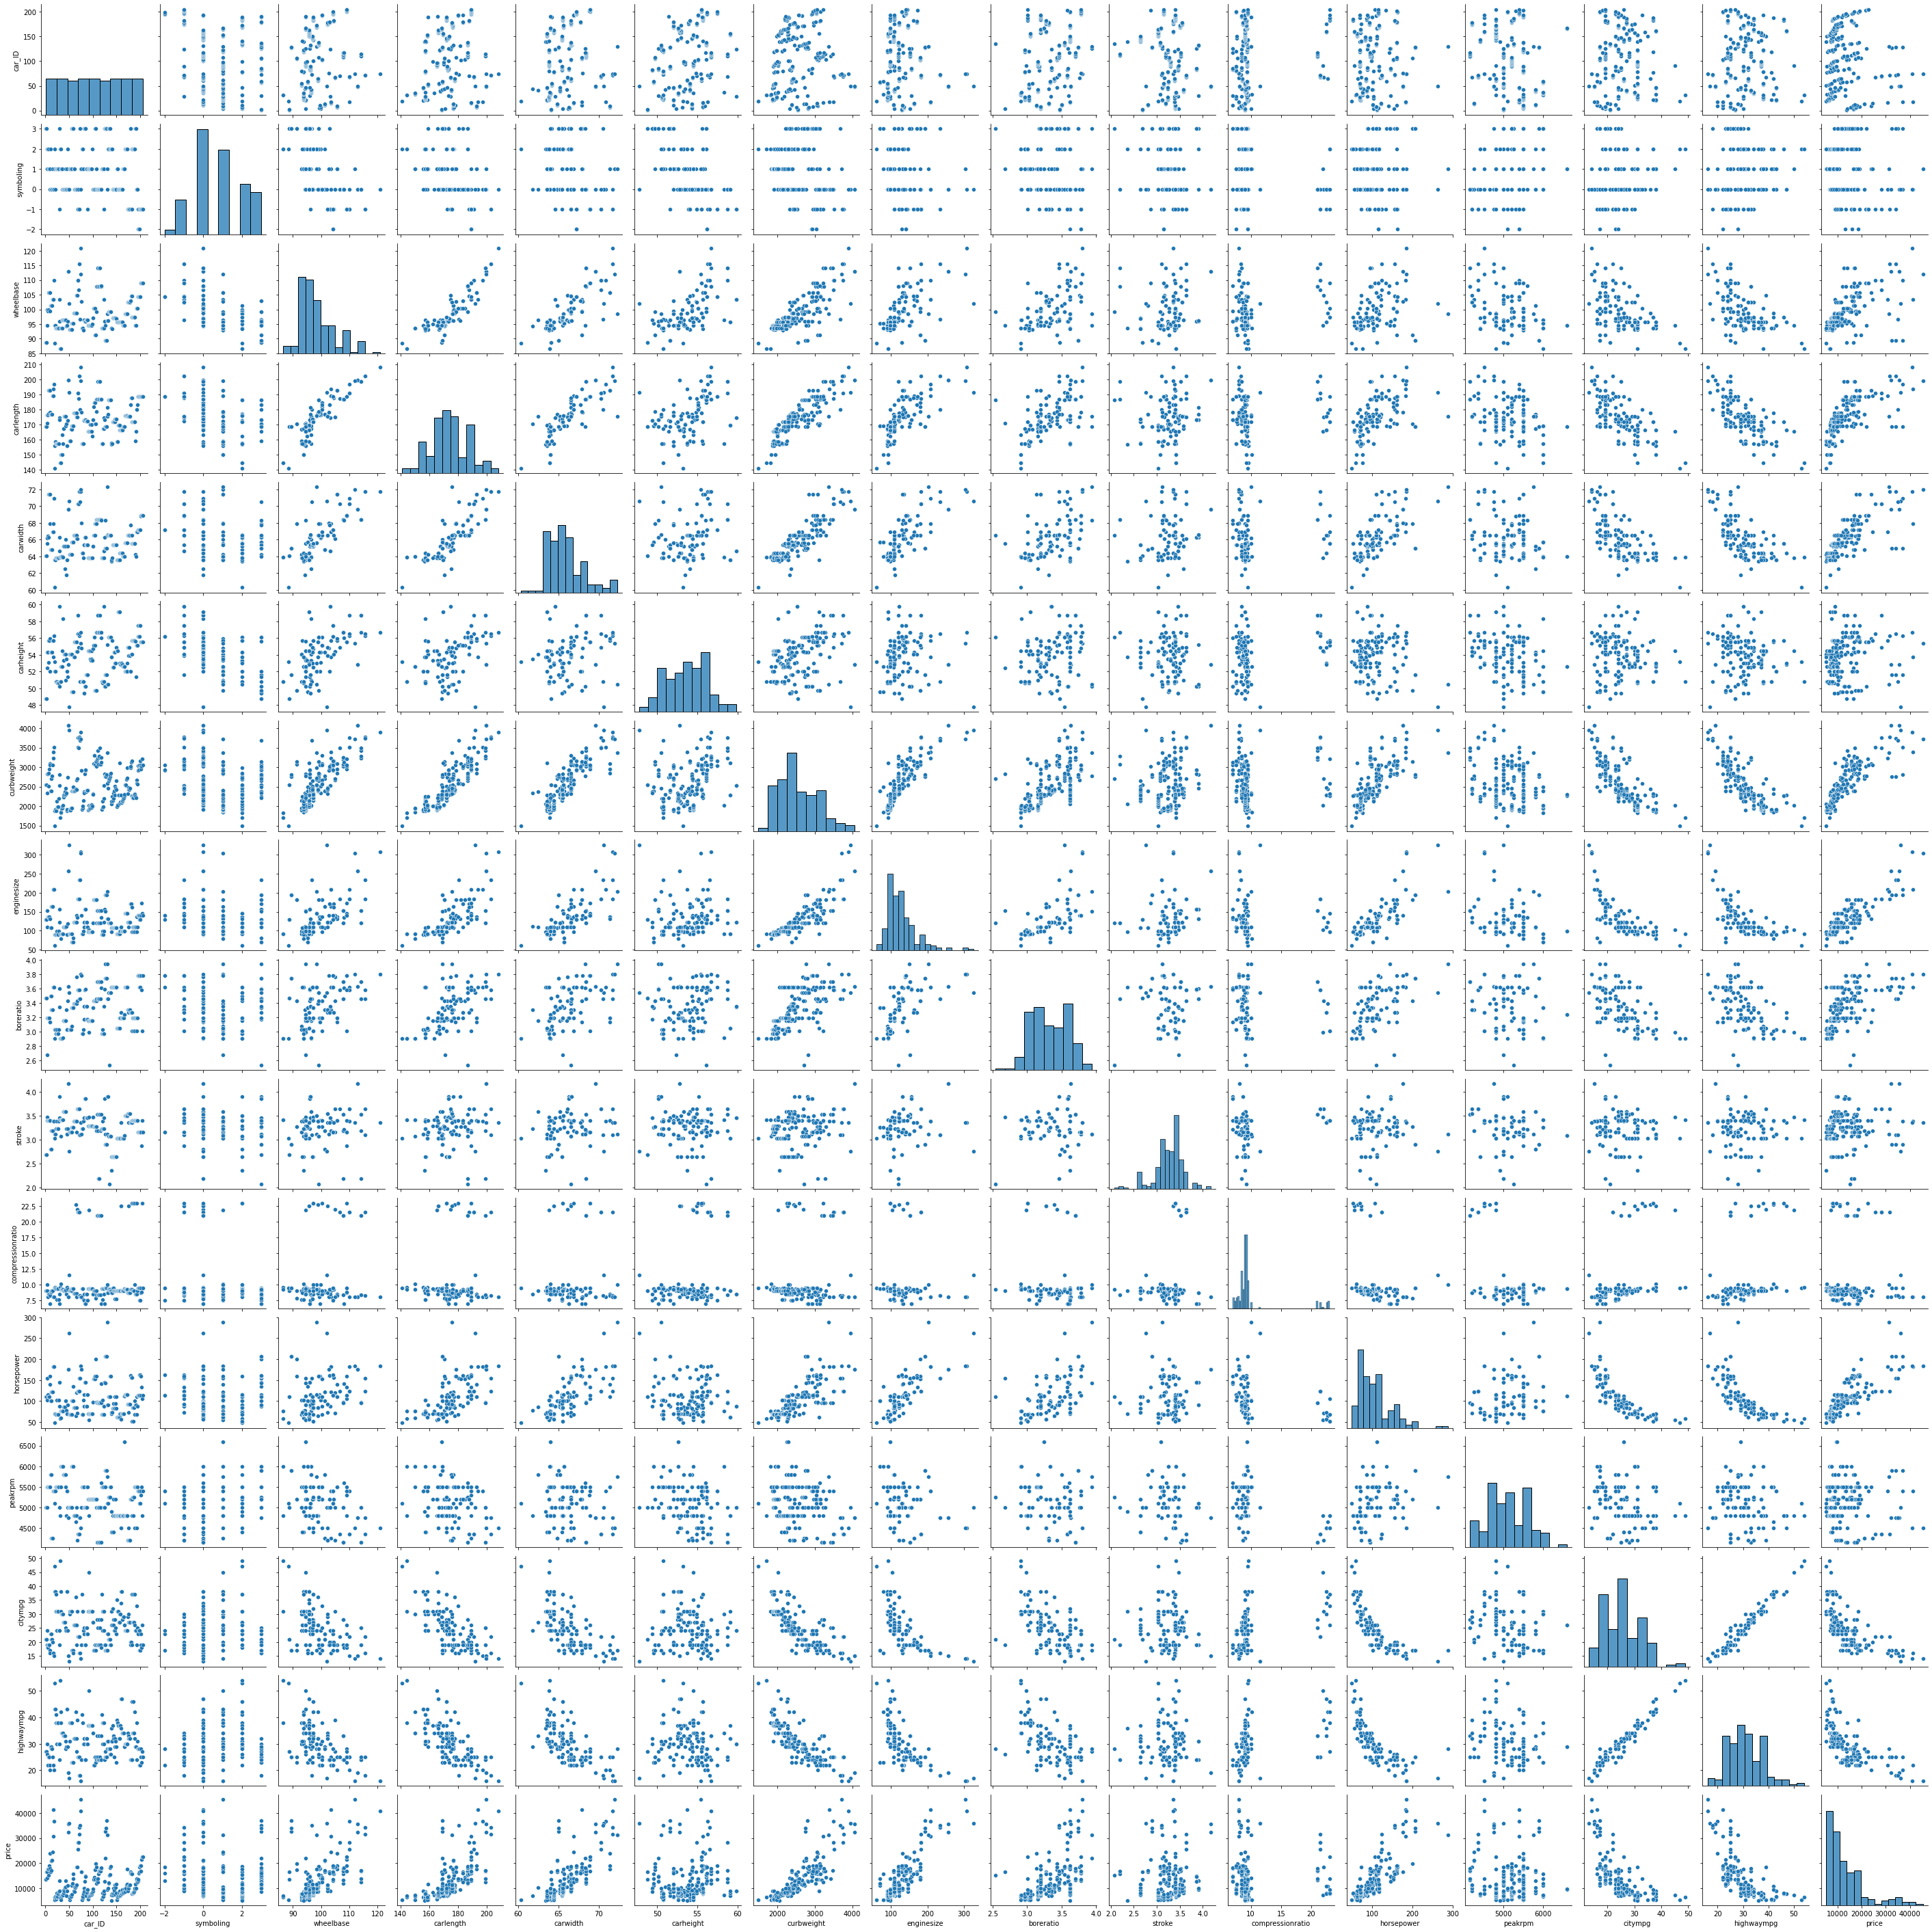

In [55]:
sns.pairplot(df)